*Supporting textbook chapters for week 3: 5.5, 5.6, 5.10*

**Lecture 3, topics:**
* Integration by Gaussian quadrature
* Numerical differentiation

# Numerical integration

* Think of integrals as areas under curves.
* Approximate these areas in terms of simple shapes (rectangles, trapezoids, rectangles with parabolic tops)

![From Newman, composite of figs. 5.1 and 5.2.](RecTrapSimp.png)

## Trapezoidal rule

## Simpson's rule

## Newton-Cotes formulas

### General idea

Trapezoid and Simpson's Rules are part of a more general set of integration rules:
* Break your interval into small **equal** sub-intervals,
* approximate your function by a polynomial of some degree, e.g. 
    * 0 for mid-point rule (that's just summing all elements and multiplying by $h$)
    * 1 for Trapz,
    * 2 for Simpson
on that sub-interval.
* this class of methods leads to Newton-Cotes (N-C) formulas.

* All Newton-Cotes formulas can be written in the form:
$$\int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$
* $w_k$: "weights".
* $x_k$: "sample points". Notice above we are using $N+1$ points ($N$ slices) to sample.
* N-C formulas of degree $N$: exact for polynomials of degree $N$ (which require $N+1$ points to determine)
* For N-C formulas, the sample points are **evenly spaced**.

### Examples

* All Newton-Cotes formulas can be written in the form:
$$I(a, b) = \int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$

**Example: Riemann sum**

$$I(a, b) \approx h \sum_{n=1}^{N} f(a+nh).$$

* weights: $\forall k \in\{1\dots{} N\},\quad w_k = h$.

**Example: trapezoidal rule**
$$I(a, b) \approx h\left[\frac12 f(a) + \frac12f(b) + \sum_{n=1}^{N-1} f(a+nh)\right].$$

* weights:
    * $w_k = h/2$ for $k=1$ or $N+1$,
    * $w_k = h$ otherwise.

* All Newton-Cotes formulas can be written in the form:
$$I(a, b) = \int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$

**Example: Simpson's rule**
$$I(a,b) \approx \frac{h}3\left[f(a) + f(b) + 4\sum_{\substack{n\ odd\\ 1\dots{}N}}f(a+nh) + 2\sum_{\substack{n\ even \\ 2\dots{}N-1}}f(a+nh)\right].$$

* weights:
    * $w_k = h/3$ for $k=1$ or $N+1$,
    * $w_k = 4h/3$ for $k=2, 4,\dots{}, N$ (recall: $N$ even),
    * $w_k = h$ for $k=3, 5,\dots{}, N-1$,

### Generalization

Degree | Polynomial | Coefficients
- | - | -
1 (trapezoidal) | Straight line | $\frac{1}{2}, 1, 1,\dots, 1, \frac{1}{2}$
2 (Simpson) | Parabola | $\frac13, \frac43, \frac23, \frac43,\dots, \frac23, \frac43, \frac13$
3 | Cubic | $\frac38, \frac98, \frac98, \frac34, \frac98, \frac98, \frac34, \dots, \frac98, \frac 38$
4 | Quartic | $\frac{14}{45}, \frac{64}{45}, \frac{8}{15}, \frac{64}{45}, \frac{28}{45}, \frac{64}{45},\dots, \frac{64}{45}, \frac{14}{45}$

## Gaussian quadrature

### Presentation

Newton-Cotes:
* had to use $N$ equally-spaced sampled points.
* $N^{\text{th}}$-order N-C exact for polynomial of degree $N$.
* A $N^{\text{th}}$-order polynomial approximates a well-behaved function better than a $(N-1)^{\text{th}}$-order polynomial, because of the added degree of freedom.

Gaussian quadrature:
* $N$ unequally-spaced points $\Rightarrow$ $N$ more degrees of freedom,
* exact for $(2N-1)^{th}$-order polynomial.
* other way to look at it: it will give the same level of accuracy as an approximation by a $(2N-1)^{th}$-order polynomial.

Remarkably, there is a universal rule to choose the $w_k$ and $x_k$:
* $x_k = $ roots of $n^{th}$ Legendre polynomial $P_N(x)$.
* $\displaystyle w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx}\right)^{-2}\right]_{x={x_k}}$, while $P_N(x_k)=0$.

Legendre polynomials: cool set of functions.
* Defined to be mutually orthonormal:
    $$\forall (M, N) \in\mathbb N^2, \quad \int_{-1}^1 P_N(x)P_M(x) dx = \frac{2\delta_{MN}}{2N+1}.$$
* Defined recursively:
    $$P_0(x) = 1 \Rightarrow P_1(x) = x \Rightarrow P_2(x) = \dots,\ \text{or}$$
    $$(N+1)P_{N+1}(x) = (2N+1)xP_N(x) -NP_{N-1}(x),\ \text{or}$$
    $$\frac{d}{dx}\left[(1-x^2)\frac{d P_{N+1}}{dx}(x)\right] = -N(N+1)P_N(x),\ \text{or}$$
    $$P_N(x) = \frac1{2^N N!}\frac{d^N}{dx^N}\left[(x^2-1)^N\right]\dots$$

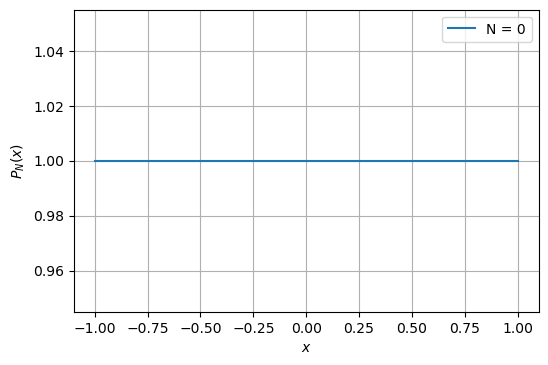

In [31]:
from scipy.special import legendre
from matplotlib.pyplot import plot, grid, xlabel, ylabel, figure, legend
from numpy import linspace

x = linspace(-1, 1, 128)
figure(dpi=100)
for N in range(1):
    plot(x, legendre(N)(x), label='N = {}'.format(N))
grid()
xlabel("$x$")
ylabel("$P_N(x)$")
legend()

Remarkably, there is a universal rule to choose the $w_k$ and $x_k$:
* $x_k = $ roots of $n^{th}$ Legendre polynomial $P_N(x)$.
* $\displaystyle w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx}\right)^{-2}\right]_{x={x_k}}$, while $P_N(x_k)=0$.
* Tables exist. Newman mentions Abramowitz and Stegun; was replaced long ago by NIST's Digital Library for Mathematical Functions. 
    For Gauss quadrature: https://dlmf.nist.gov/3.5#v

* That there is such a universal rule is beautiful (see Appendix C of textbook), but in the context of this course, we'll just accept that it works.
* Don’t even write your own program to find sample points and weights. Usually use given subroutines. We will have some practice next week on how to find them.
* E.g. you have 
    * `gaussxw.py` for integration limits from $-1$ to $+1$,
    * `gaussxwab.py` for integration limits from $a$ to $b$.
* The calculation of weights and points is expensive. Use `gaussxw.py` if you are going to change the limits repeatedly (and see end of §5.6.1, pp. 167-168, for how to do).

In [ ]:
%load gaussxw

In [10]:
# manipulate gaussxw 

(array([ 9.06179846e-01,  5.38469310e-01, -8.97547387e-17, -5.38469310e-01,
        -9.06179846e-01]),
 array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]))

In [32]:
# We can reproduce Newman's figure 5.4 with his code 
from matplotlib.pyplot import bar, title

N = 10

figure(dpi=100)
bar(, , width=0.02)
grid()
title("For $N = {}$".format(N))
xlabel('position $x$')
ylabel('weight $w_k$')

SyntaxError: invalid syntax (<ipython-input-32-e7cf94f70ccf>, line 7)

**Pros**
* complicated error formula, but in general: approximation error improves by a factor $c/N^2$ when you increase # of sample points by 1!
* e.g., going form $N=10$ to $N=11$ sample points improves your estimate by a factor of $\sim 100$ $\Rightarrow$ converge very quickly to true value of the integral.

**Cons**
* only works well if function is reasonably smooth (since sample points are farther apart),
* really hard to get an accurate estimate of the error, if needed.

### Example:

Compute $\displaystyle \int_{-1}^{1} \left[x^4 + \sin(x^2)\right]dx$ using Gaussian quadrature.

Let's see what is going on with sympy, Python's symbolic math package:

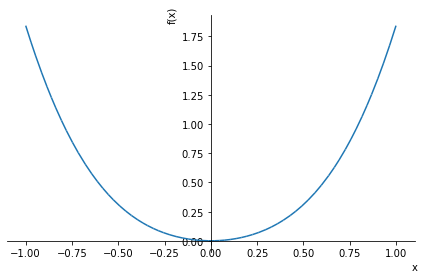

In [36]:
from sympy import *
init_printing()
x = symbols('x', real=True)
f = x**4 + sin(x**2)
plotting.plot(f, (x, -1, 1))

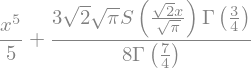

In [37]:
# Integrate f
integrate(f, x)

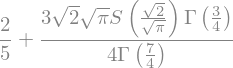

In [39]:
# from -1 to +1
res=integrate(f, (x, -1, +1))
res

In [6]:
# Numerical evaluation
N(res)

Now, we could do this as long as the function has an analytical expression that `sympy` (or Maple, Mathematica, Wolfram Alpha...) knows how to solve.

Gaussian quadrature is more reliable for arbitrary functions, let's try.

In [ ]:
# This cell for pseudo-code
# NOTE HOW I KEEP IT AS A SEPARATE BLOCK OF CODE
# Load Newman's functions for gaussxw
# Load numpy
# define function
# define N
# call gaussxw for xi, wi
# initialize integral to 0.
# loop over sample points to compute integral
# print

In [7]:
# This cell for code
# Load Newman's functions for gaussxw
# Load numpy
import gaussxw as gsx
import numpy as np
# define function
def f(x):
    """ lil description """
    return x**4 + np.sin(x**2)

# define N
N = 10
# call gausswx for xi, wi
x, w = gsx.gaussxw(N)

# initialize integral to 0.
I = 0.
# loop over sample points to compute integral
for k in range(N):
    I += w[k]*f(x[k])
# print
print(I)

1.0205366034471288


### Derivation outline

Appendix C of Newman:
* Use the fact that 
    $$\forall k\in\{0, \dots N-1\}, \quad \int_{-1}^1 x^kP_N(x)dx = 0$$
    and
    $$\int_{-1}^1 [P_N(x)]^2dx = \frac{2}{2N+1}.$$
* Suppose $f(x) = A_{2N-1} x^{2N-1} + A_{2N-2}x^{2N-2} + \dots + A_0$, and divide by $P_N(x)$:
    $$f(x) = q(x)P_N(x) + r(x),$$
    with $q$, $r$ polynomials of order $N-1$.
* Therefore, 
    $$\int_{-1}^1 f(x)dx \approx \sum_{k=1}^N w_k f(x_k) = \sum_{k=1}^N w_k q(x_k)P_N(x_k) + \sum_{k=1}^N w_k r(x_k)$$
* Choose $x_k$'s such that $P_N(x_k) = 0$ (roots)
    $$\Rightarrow\ \int_{-1}^1 f(x)dx \approx \sum_{k=1}^N w_k r(x_k),$$
    i.e., as accurate as integrating a polynomial of order $N-1$.
* No loss of information, because "encoded" in the $(x_k, w_k)$'s.

# Numerical derivatives

* Simpler than numerical integration, in  a way.
* Computing errors is usually a doozey though.
* Based on Taylor series approximations.
* Use Taylor series approximations to estimate errors.


1. Forward difference approximation: $\displaystyle f'(x) \approx \frac{f(x+h) - f(x)}{h}$,
2. Backward difference approximation: $\displaystyle f'(x) \approx \frac{f(x) - f(x-h)}{h}$,


## Basic philosophy for error estimation

Use Taylor series to find error in these approximations:
$$ f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + h.o.t.$$
Isolate for $f'(x)$:
$$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}2 f''(x) + h.o.t.$$
$\Rightarrow$ error is 1st-order in $h$ (same is true for backward difference method).

## Central differences

* Using Taylor series to find sneaky improvements to finite difference (FD) schemes.
* Example: central FD method:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}.$$
* Notice it still only involves subtracting 2 points, it's just that the location of the 2 points is different.

* Error:
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + h.o.t.$$
$$f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + h.o.t.$$

* Substract:
$$ f(x+h) - f(x+h) = 2hf'(x) + \frac{h^3}{3}f'''(x) + h.o.t.$$
* Isolate for $f'(x)$ and add:
$$f'(x) = \frac{f(x+h) - f(x-h)}{2h} - \boxed{\frac{h^2}{3}f'''(x)} + h.o.t.$$

* So we see that this formula is accurate to 2nd order in $h$.
* Can get higher-order methods by including more points (see table 5.1 on page 196).
* Might have to do different things near the boundaries (see "Generating a relief map" in this week's lab).
* Partial derivatives: similar techniques
* Higher order derivatives (e.g. $f''$) similar techniques.

## Roundoff error, a comeback

Let's go back to the first lab:

* Let’s take another look at this formula:
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + h.o.t.$$
* What happens when we consider roundoff error? Recall that substracting numbers that are close is dangerous!
* Each of the terms $f(x+h)$ and $f(x)$ have error $\sim C|f(x)|$. Their difference will have approximate error $2Cf(x)$ ("worst case" error).
* So in fact there are two sources of error and this leads to (eqn. (5.91) in book):
$$\epsilon = \underbrace{\frac{2C|f(x)|}{h}}_{\text{round-off error}} + \underbrace{\frac{1}{2}h |f''(x)| + h.o.t.}_{\text{approximation error}}$$

* Factor $1/h \Rightarrow$ increasing $N$ could increase the error.
* The error has a minimum when $h$ satisfies
$$h = \sqrt{4C\left|\frac{f(x)}{f''(x)}\right|} \qquad (5.93).$$
(*Note: $x$ is not a variable in this discussion. $f(x)$ should be interpreted as the typical magnitude of $f$.*)
* Example: $f(x), f''(x) = O(1) \Rightarrow h\sim O(\sqrt{C}) = O(10^{-8})$. In this case, the error is $\epsilon = O(10^{-8})$, from
$$\epsilon = h|f''(x)| = \sqrt{4C \left|f(x)f''(x)\right|} \qquad (5.94).$$
* There are two points: there's a limit to the improvement you can obtain by going to finer resolution, and the precision expected on differentiation is orders of magnitude less than that of other operations we have discussed.